# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Bill Van Ricardo Zalukhu
- **Email:** ricardozalukhu1925@yahoo.com
- **ID Dicoding:** ricardo_zalukhu

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi penjualan berdasarkan kategori produk dan bagaimana trend penjualan dari waktu ke waktu?
2. Siapa pelanggan terbaik berdasarkan analissi RFM dan bagaimana karakteristik mereka?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Geospatial Analysis
import folium
from folium.plugins import HeatMap

# Date and Time
from datetime import datetime, timedelta

# Itertools for combinations
from itertools import combinations
from collections import Counter

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Download Dataset
import kagglehub

# Setting Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Data Wrangling

### Gathering Data

In [2]:
# Download ddataset dari Kaggle
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
print(path)

# load semua datastet
customers_df = pd.read_csv(f"{path}/olist_customers_dataset.csv")
geolocation_df = pd.read_csv(f"{path}/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv(f"{path}/olist_order_items_dataset.csv")
order_payments_df = pd.read_csv(f"{path}/olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv(f"{path}/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv(f"{path}/olist_orders_dataset.csv")
products_df = pd.read_csv(f"{path}/olist_products_dataset.csv")
sellers_df = pd.read_csv(f"{path}/olist_sellers_dataset.csv")
product_category_df = pd.read_csv(f"{path}/product_category_name_translation.csv")

print("\n=== Dataset berhasil dimuat ===")
print(f"Customers: {customers_df.shape}")
print(f"Geolocation: {geolocation_df.shape}")
print(f"Order Items: {order_items_df.shape}")
print(f"Order Payments: {order_payments_df.shape}")
print(f"Order Reviews: {order_reviews_df.shape}")
print(f"Orders: {orders_df.shape}")
print(f"Products: {products_df.shape}")
print(f"Sellers: {sellers_df.shape}")
print(f"Product Category Translation: {product_category_df.shape}")

C:\Users\bilva\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2

=== Dataset berhasil dimuat ===
Customers: (99441, 5)
Geolocation: (1000163, 5)
Order Items: (112650, 7)
Order Payments: (103886, 5)
Order Reviews: (99224, 7)
Orders: (99441, 8)
Products: (32951, 9)
Sellers: (3095, 4)
Product Category Translation: (71, 2)


In [3]:
# Preview data utama
print("=== Orders Dataset ===")
display(orders_df.head())
print("\n=== Customers Dataset ===")
display(customers_df.head())
print("\n=== Order Items Dataset ===")
display(order_items_df.head())

=== Orders Dataset ===


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



=== Customers Dataset ===


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



=== Order Items Dataset ===


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Dataset terdiri dari 9 file CSV yang saling terhubung melalui berbagai ID
- Data mencakup informasi lengkap tentang pelanggan, pesanan, produk, penjual, dan lokasi geografis
- Periode data perlu dicek untuk memahami rentang waktu transaksi

### Assessing Data

#### Assessing Data Orders

In [4]:
print("\n--- Info ---")
print(orders_df.info())

print("\n--- Missing Values ---")
missing_orders = orders_df.isnull().sum()
print(missing_orders[missing_orders > 0])

print("\n--- Duplicates ---")
print(f"Duplicate rows: {orders_df.duplicated().sum()}")

print("\n--- Statistical Summary ---")
print(orders_df.describe())

print("\n--- Order Status Distribution ---")
print(orders_df['order_status'].value_counts())
print(f"\nPercentage delivered: {(orders_df['order_status']=='delivered').sum()/len(orders_df)*100:.2f}%")



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

--- Missing Values ---
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

--- Duplicates ---
Duplicate rows: 0

--- Statistical Summary ---
                         

#### Assessing Data Order Items

In [5]:
print("\n--- Info ---")
print(order_items_df.info())

print("\n--- Missing Values ---")
missing_items = order_items_df.isnull().sum()
print(missing_items[missing_items > 0])

print("\n--- Duplicates ---")
print(f"Duplicate rows: {order_items_df.duplicated().sum()}")

print("\n--- Statistical Summary ---")
print(order_items_df.describe())

print("\n--- Price Outliers Check ---")
print(f"Min Price: {order_items_df['price'].min()}")
print(f"Max Price: {order_items_df['price'].max()}")
print(f"Mean Price: {order_items_df['price'].mean():.2f}")
print(f"Median Price: {order_items_df['price'].median():.2f}")


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

--- Missing Values ---
Series([], dtype: int64)

--- Duplicates ---
Duplicate rows: 0

--- Statistical Summary ---
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.8

#### Assessing Data Customers

In [6]:
print("\n--- Info ---")
print(customers_df.info())

print("\n--- Missing Values ---")
missing_customers = customers_df.isnull().sum()
print(missing_customers[missing_customers > 0])

print("\n--- Duplicates ---")
print(f"Duplicate rows: {customers_df.duplicated().sum()}")
print(f"Duplicate customer_id: {customers_df['customer_id'].duplicated().sum()}")
print(f"Duplicate customer_unique_id: {customers_df['customer_unique_id'].duplicated().sum()}")


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

--- Missing Values ---
Series([], dtype: int64)

--- Duplicates ---


Duplicate rows: 0
Duplicate customer_id: 0
Duplicate customer_unique_id: 3345


#### Assessing Data Products

In [7]:
print("\n--- Info ---")
print(products_df.info())

print("\n--- Missing Values ---")
missing_products = products_df.isnull().sum()
print(missing_products[missing_products > 0])

print("\n--- Category Distribution ---")
print(f"Unique categories: {products_df['product_category_name'].nunique()}")
print(f"Missing categories: {products_df['product_category_name'].isnull().sum()}")


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

--- Missing Values ---
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2


#### Assessing Data Sellers

In [8]:
print("\n--- Info ---")
print(sellers_df.info())

print("\n--- Missing Values ---")
missing_sellers = sellers_df.isnull().sum()
print(missing_sellers[missing_sellers > 0])

print("\n--- Duplicates ---")
print(f"Duplicate rows: {sellers_df.duplicated().sum()}")


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

--- Missing Values ---
Series([], dtype: int64)

--- Duplicates ---
Duplicate rows: 0


#### Assessing Data Payments

In [9]:
print("\n--- Info ---")
print(order_payments_df.info())

print("\n--- Missing Values ---")
missing_payments = order_payments_df.isnull().sum()
print(missing_payments[missing_payments > 0])

print("\n--- Payment Type Distribution ---")
print(order_payments_df['payment_type'].value_counts())

print("\n--- Payment Value Statistics ---")
print(order_payments_df['payment_value'].describe())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

--- Missing Values ---
Series([], dtype: int64)

--- Payment Type Distribution ---
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

--- Payment Value Statistics ---
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000

#### Assessing Geolocation Dataset

In [10]:
print("\n--- Info ---")
print(geolocation_df.info())

print("\n--- Missing Values ---")
missing_geo = geolocation_df.isnull().sum()
print(missing_geo[missing_geo > 0])

print("\n--- Duplicates ---")
print(f"Duplicate rows: {geolocation_df.duplicated().sum()}")
print(f"Duplicate zip codes: {geolocation_df['geolocation_zip_code_prefix'].duplicated().sum()}")


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

--- Missing Values ---
Series([], dtype: int64)

--- Duplicates ---
Duplicate rows: 261831
Duplicate zip codes: 981148


#### Assessing Data Reviews

In [11]:
print("\n--- Info ---")
print(order_reviews_df.info())

print("\n--- Missing Values ---")
missing_reviews = order_reviews_df.isnull().sum()
print(missing_reviews[missing_reviews > 0])

print("\n--- Review Score Distribution ---")
print(order_reviews_df['review_score'].value_counts().sort_index())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

--- Missing Values ---
review_comment_title      87656
review_comment_message    58247
dtype: int64

--- Review Score Distribution ---
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


#### Assessing Data Product Category Translation

In [12]:
print("\n--- Info ---")
print(product_category_df.info())

print("\n--- Missing Values ---")
missing_category = product_category_df.isnull().sum()
print(missing_category[missing_category > 0])

print("\n--- Duplicates ---")
print(f"Duplicate rows: {product_category_df.duplicated().sum()}")
print(f"Duplicate category names: {product_category_df['product_category_name'].duplicated().sum()}")

print("\n--- Sample Translations ---")
print(product_category_df.head(10))


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

--- Missing Values ---
Series([], dtype: int64)

--- Duplicates ---
Duplicate rows: 0
Duplicate category names: 0

--- Sample Translations ---
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
5           esporte_lazer                sports_leisure
6              perfumaria                     perfumery
7   utilida

In [13]:
# Temporal Data Check
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
print(f"Start Date: {orders_df['order_purchase_timestamp'].min()}")
print(f"End Date: {orders_df['order_purchase_timestamp'].max()}")
print(f"Duration: {(orders_df['order_purchase_timestamp'].max() - orders_df['order_purchase_timestamp'].min()).days}")

Start Date: 2016-09-04 21:15:19
End Date: 2018-10-17 17:30:18
Duration: 772


**Insight:**
- Orders: mayoritas berstatust 'delivered', ada missing values di timestamp
- Order Items: terdapat outliers pada price dan freight_value
- Customers: tidak ada missing values, data bersih
- Products: ~ 600 category names perlu di-handle
- Payments: tidak ada missing values, credit_card dominan
- Geolocation: banyak duplicate zip codes
- Reviews: missing values di review_comment
- Data mencakup periode ~2 tahun

### Cleaning Data

In [14]:
print("\n### 1. CLEANING ORDERS DATASET ###")
# Filter hanya order yang delivered
orders_clean = orders_df[orders_df['order_status'] == 'delivered'].copy()
print(f"✓ Filtered to delivered orders only: {len(orders_clean)} rows (from {len(orders_df)})")

# Convert datetime columns
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 
                 'order_delivered_carrier_date', 'order_delivered_customer_date', 
                 'order_estimated_delivery_date']

for col in datetime_cols:
    orders_clean[col] = pd.to_datetime(orders_clean[col])
print(f"✓ Converted {len(datetime_cols)} datetime columns")

# Remove orders with missing critical timestamps
orders_clean = orders_clean.dropna(subset=['order_delivered_customer_date'])
print(f"✓ Removed rows with missing delivery date: {len(orders_clean)} rows remaining")


print("\n### 2. CLEANING ORDER ITEMS DATASET ###")
# Remove negative or zero prices
order_items_clean = order_items_df[order_items_df['price'] > 0].copy()
print(f"✓ Removed invalid prices: {len(order_items_clean)} rows (from {len(order_items_df)})")

# Remove extreme outliers in price (using IQR method)
Q1 = order_items_clean['price'].quantile(0.25)
Q3 = order_items_clean['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
order_items_clean = order_items_clean[(order_items_clean['price'] >= lower_bound) & 
                                       (order_items_clean['price'] <= upper_bound)]
print(f"✓ Removed extreme price outliers: {len(order_items_clean)} rows remaining")


print("\n### 3. CLEANING PRODUCTS DATASET ###")
# Handle missing category names
products_clean = products_df.copy()
products_clean['product_category_name'] = products_clean['product_category_name'].fillna('sem_categoria')
print(f"✓ Filled {products_df['product_category_name'].isnull().sum()} missing category names with 'sem_categoria'")

# Remove products with missing dimensions (if all dimensions are missing)
dimension_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
products_clean = products_clean.dropna(subset=dimension_cols, how='all')
print(f"✓ Removed products with all missing dimensions: {len(products_clean)} rows remaining")


print("\n### 4. CLEANING CUSTOMERS DATASET ###")
# Customers dataset is already clean, just verify
customers_clean = customers_df.copy()
print(f"✓ Customers dataset: {len(customers_clean)} rows (no cleaning needed)")


print("\n### 5. CLEANING SELLERS DATASET ###")
# Sellers dataset is already clean
sellers_clean = sellers_df.copy()
print(f"✓ Sellers dataset: {len(sellers_clean)} rows (no cleaning needed)")


print("\n### 6. CLEANING PAYMENTS DATASET ###")
# Remove payments with zero or negative value
payments_clean = order_payments_df[order_payments_df['payment_value'] > 0].copy()
print(f"✓ Removed invalid payment values: {len(payments_clean)} rows (from {len(order_payments_df)})")


print("\n### 7. CLEANING GEOLOCATION DATASET ###")
# Remove invalid coordinates (outside Brazil bounds)
# Brazil approximate bounds: lat (-34 to 5), lng (-74 to -34)
geo_clean = geolocation_df[
    (geolocation_df['geolocation_lat'].between(-34, 6)) &
    (geolocation_df['geolocation_lng'].between(-75, -30))
].copy()
print(f"✓ Removed invalid coordinates: {len(geo_clean)} rows (from {len(geolocation_df)})")

# Remove duplicates, keep first occurrence
geo_clean = geo_clean.drop_duplicates(subset=['geolocation_zip_code_prefix'])
print(f"✓ Removed duplicate zip codes: {len(geo_clean)} unique locations")


print("\n### 8. CLEANING REVIEWS DATASET ###")
# Remove invalid scores
reviews_clean = order_reviews_df[order_reviews_df['review_score'].between(1, 5)].copy()
print(f"✓ Validated review scores: {len(reviews_clean)} rows")


print("\n### 9. MERGING DATASETS ###")
print("Merging all cleaned datasets...")

# Start with cleaned orders
merged_df = orders_clean.copy()
print(f"  Starting with orders: {len(merged_df)} rows")

# Merge with order items
merged_df = merged_df.merge(order_items_clean, on='order_id', how='inner')
print(f"  After merging order_items: {len(merged_df)} rows")

# Merge with products
merged_df = merged_df.merge(products_clean, on='product_id', how='left')
print(f"  After merging products: {len(merged_df)} rows")

# Merge with product category translation
merged_df = merged_df.merge(product_category_df, on='product_category_name', how='left')
print(f"  After merging category translation: {len(merged_df)} rows")

# Handle untranslated categories
merged_df['product_category_name_english'] = merged_df['product_category_name_english'].fillna(
    merged_df['product_category_name']
)
merged_df['product_category_name_english'] = merged_df['product_category_name_english'].fillna('unknown')
print(f"  Handled missing category translations")

# Merge with customers
merged_df = merged_df.merge(customers_clean, on='customer_id', how='left')
print(f"  After merging customers: {len(merged_df)} rows")

# Merge with sellers
merged_df = merged_df.merge(sellers_clean, on='seller_id', how='left')
print(f"  After merging sellers: {len(merged_df)} rows")

# Merge with payments (aggregate by order_id first)
payments_agg = payments_clean.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_type': 'first',
    'payment_installments': 'first'
}).reset_index()

merged_df = merged_df.merge(payments_agg, on='order_id', how='left')
print(f"  After merging payments: {len(merged_df)} rows")

# Merge with reviews (optional, keep left join)
reviews_agg = reviews_clean.groupby('order_id').agg({
    'review_score': 'mean',
    'review_comment_message': 'first'
}).reset_index()

merged_df = merged_df.merge(reviews_agg, on='order_id', how='left')
print(f"  After merging reviews: {len(merged_df)} rows")

print(f"\n✓ Final merged dataset: {merged_df.shape}")


print("\n### 10. FINAL DATA VALIDATION ###")
print("\nMissing values in merged dataset:")
missing_final = merged_df.isnull().sum()
print(missing_final[missing_final > 0])

print("\nData types:")
print(merged_df.dtypes.value_counts())

print("\nFinal dataset ready for analysis!")

# Store the main dataframe
orders_items_merged = merged_df.copy()


### 1. CLEANING ORDERS DATASET ###
✓ Filtered to delivered orders only: 96478 rows (from 99441)
✓ Converted 5 datetime columns
✓ Removed rows with missing delivery date: 96470 rows remaining

### 2. CLEANING ORDER ITEMS DATASET ###
✓ Removed invalid prices: 112650 rows (from 112650)
✓ Removed extreme price outliers: 108576 rows remaining

### 3. CLEANING PRODUCTS DATASET ###
✓ Filled 610 missing category names with 'sem_categoria'
✓ Removed products with all missing dimensions: 32949 rows remaining

### 4. CLEANING CUSTOMERS DATASET ###
✓ Customers dataset: 99441 rows (no cleaning needed)

### 5. CLEANING SELLERS DATASET ###
✓ Sellers dataset: 3095 rows (no cleaning needed)

### 6. CLEANING PAYMENTS DATASET ###
✓ Removed invalid payment values: 103877 rows (from 103886)

### 7. CLEANING GEOLOCATION DATASET ###
✓ Removed invalid coordinates: 1000132 rows (from 1000163)
✓ Removed duplicate zip codes: 19011 unique locations

### 8. CLEANING REVIEWS DATASET ###
✓ Validated review scores: 

In [15]:
print("- Final dataset: {:,} rows x {} columns".format(*orders_items_merged.shape))

- Final dataset: 106,275 rows x 35 columns


**Insight:**
- Melakukan filter untuk order yang sudah diantarkan untuk analisis yang lebih akurat
- Menghapus harga yang tidak valid dan outlier ekstrim
- Memperbaiki nama kategori yang hilang dan tranlasinya
- Memvalidasi titik koordinat dengan batasan Brasil
- Menggabungkan seluruh data menjadi satu _dataframe_ yang komprehensif

## Exploratory Data Analysis (EDA)

In [16]:
# Top 10 kategori produk
print("\n--- Top 10 Product Categories by Volume ---")
top_categories = orders_items_merged['product_category_name_english'].value_counts().head(10)
print(top_categories)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Sales Volume', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('top_categories_volume.png', dpi=300, bbox_inches='tight')
print("✓ Saved: top_categories_volume.png")
plt.close()


--- Top 10 Product Categories by Volume ---
product_category_name_english
bed_bath_table           10878
health_beauty             9001
sports_leisure            8245
furniture_decor           8109
computers_accessories     7453
housewares                6692
watches_gifts             5255
telephony                 4358
garden_tools              4120
auto                      3908
Name: count, dtype: int64
✓ Saved: top_categories_volume.png


In [17]:
# Revenue by category
print("\n--- Top 10 Product Categories by Revenue ---")
category_revenue = orders_items_merged.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10)
print(category_revenue)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='rocket')
plt.title('Top 10 Product Categories by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue (R$)')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('top_categories_revenue.png', dpi=300, bbox_inches='tight')
print("✓ Saved: top_categories_revenue.png")
plt.close()


--- Top 10 Product Categories by Revenue ---
product_category_name_english
bed_bath_table           1631231.53
furniture_decor          1345150.24
computers_accessories    1337699.62
health_beauty            1243016.05
sports_leisure           1161590.61
housewares                979560.12
watches_gifts             880111.86
garden_tools              659990.10
office_furniture          618337.15
auto                      610995.65
Name: payment_value, dtype: float64
✓ Saved: top_categories_revenue.png


In [18]:
# Monthly sales trend
print("\n--- Monthly Sales Trend ---")
orders_items_merged['year_month'] = orders_items_merged['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = orders_items_merged.groupby('year_month').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

print(monthly_sales.head(10))

fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(monthly_sales['year_month'], monthly_sales['order_id'], 
         color='blue', marker='o', linewidth=2, label='Number of Orders')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Orders', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(monthly_sales['year_month'], monthly_sales['payment_value'], 
         color='red', marker='s', linewidth=2, label='Revenue')
ax2.set_ylabel('Revenue (R$)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=300, bbox_inches='tight')
print("✓ Saved: monthly_sales_trend.png")
plt.close()


--- Monthly Sales Trend ---
  year_month  order_id  payment_value
0    2016-09         1           0.00
1    2016-10       251       50532.79
2    2016-12         1          19.62
3    2017-01       718      144174.35
4    2017-02      1585      252893.91
5    2017-03      2436      394960.80
6    2017-04      2201      347125.27
7    2017-05      3398      544338.88
8    2017-06      3015      464711.16
9    2017-07      3770      628319.91
✓ Saved: monthly_sales_trend.png


**Insight:**
- Kategori bed_bath_table, healthy_beauty, dan sports_leisure mendominasi
- Terdapat tren peningkatan penjualan dari waktu ke waktu
- _Revenue_ tertinggi tidak selalu dari kategori dengan volumen terbanyak

## Visualization & Explanatory Analysis

### Pertanyaan 1:


### PERTANYAAN 1: Distribusi penjualan dan tren produk berdasarkan kategorinya dari waktu ke waktu ###

--- Price Distribution by Category ---
✓ Saved: price_distribution_by_category.png

--- Sales Trend of Top 5 Categories ---
✓ Saved: top5_categories_trend.png


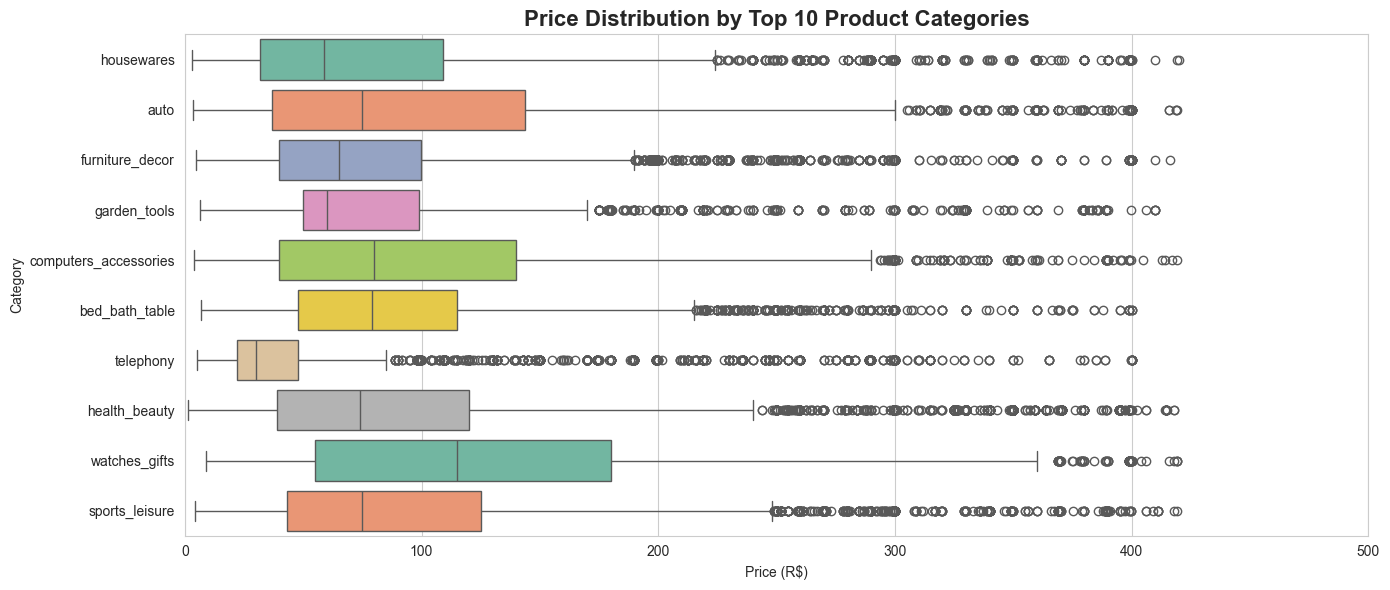

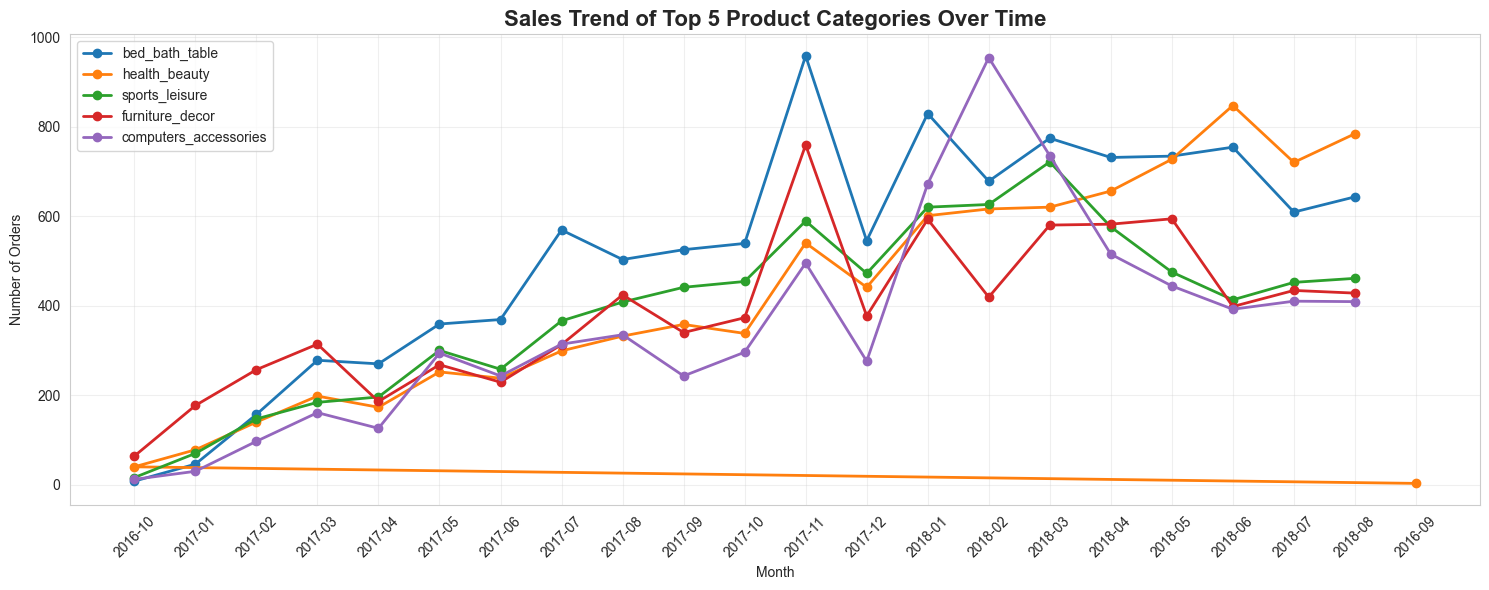

In [19]:
print("\n### PERTANYAAN 1: Distribusi penjualan dan tren produk berdasarkan kategorinya dari waktu ke waktu ###")

# Price distribution by category
print("\n--- Price Distribution by Category ---")
top_10_categories = orders_items_merged['product_category_name_english'].value_counts().head(10).index
df_top_categories = orders_items_merged[orders_items_merged['product_category_name_english'].isin(top_10_categories)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_categories, y='product_category_name_english', x='price', palette='Set2')
plt.title('Price Distribution by Top 10 Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Price (R$)')
plt.ylabel('Category')
plt.xlim(0, 500)
plt.tight_layout()
plt.savefig('price_distribution_by_category.png', dpi=300, bbox_inches='tight')
print("✓ Saved: price_distribution_by_category.png")

# Sales trend of top 5 categories
print("\n--- Sales Trend of Top 5 Categories ---")
top_5_cat = orders_items_merged['product_category_name_english'].value_counts().head(5).index
df_top5 = orders_items_merged[orders_items_merged['product_category_name_english'].isin(top_5_cat)]

trend_data = df_top5.groupby(['year_month', 'product_category_name_english']).size().reset_index(name='count')
trend_data['year_month'] = trend_data['year_month'].astype(str)

plt.figure(figsize=(15, 6))
for cat in top_5_cat:
    cat_data = trend_data[trend_data['product_category_name_english'] == cat]
    plt.plot(cat_data['year_month'], cat_data['count'], marker='o', linewidth=2, label=cat)

plt.title('Sales Trend of Top 5 Product Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('top5_categories_trend.png', dpi=300, bbox_inches='tight')
print("✓ Saved: top5_categories_trend.png")
# plt.close()

### Pertanyaan 2:


### PERTANYAAN 2: Pelanggan terbaik berdasarkan RFM Analysis ###

--- Calculating RFM Metrics ---

=== RFM Statistics ===
            recency     frequency      monetary
count  89740.000000  89740.000000  89740.000000
mean     237.929964      1.033486    177.939452
std      152.442810      0.209492    464.047525
min        1.000000      1.000000      0.000000
25%      114.000000      1.000000     62.390000
50%      219.000000      1.000000    107.780000
75%      346.000000      1.000000    186.400000
max      714.000000     15.000000  45256.000000

--- Creating RFM Scores ---

=== Customer Segments ===
segment
Potential Loyalists    36897
Loyal Customers        30315
At Risk                11789
Champions               7707
Lost                    3032
Name: count, dtype: int64
✓ Saved: rfm_segments_analysis.png

=== Top 10 Customers ===
                    customer_unique_id  recency  frequency  monetary  \
451   013ef03e0f3f408dd9bf555e4edcdc0a       41          2    245.37   
528  

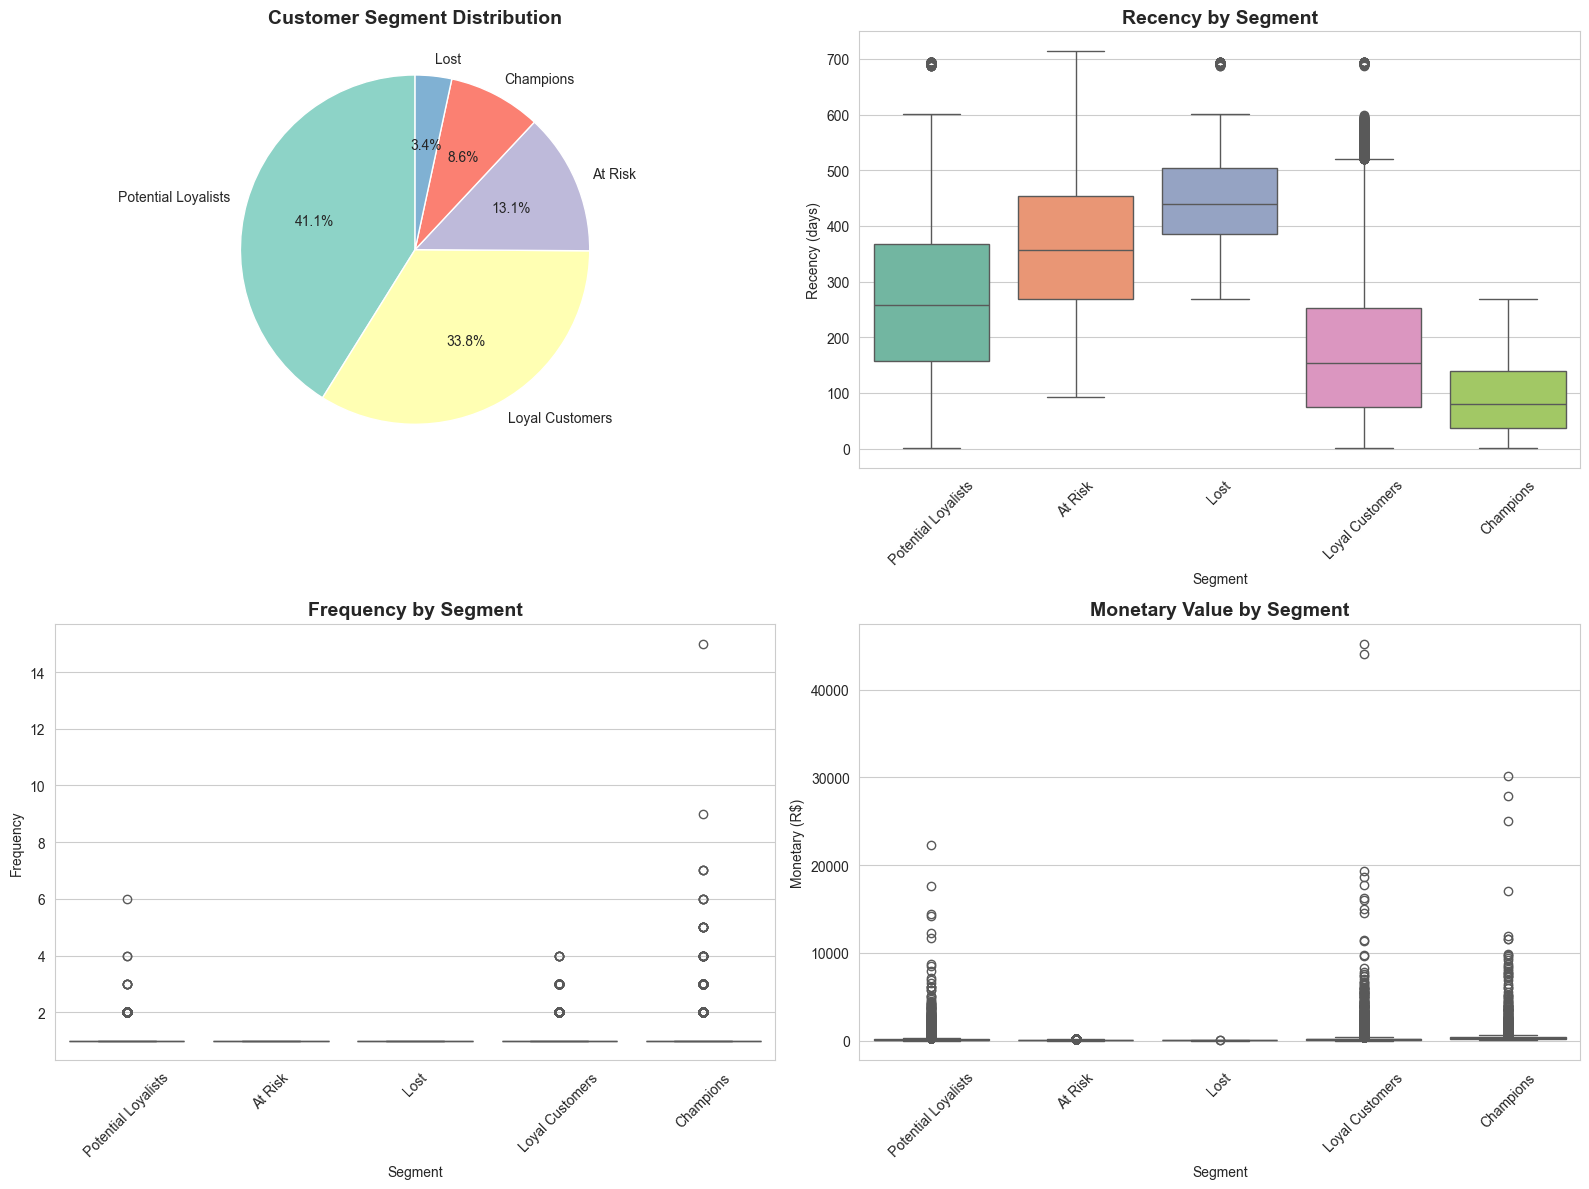

In [20]:
print("\n### PERTANYAAN 2: Pelanggan terbaik berdasarkan RFM Analysis ###")

# RFM Analysis
print("\n--- Calculating RFM Metrics ---")
reference_date = orders_items_merged['order_purchase_timestamp'].max() + timedelta(days=1)

rfm_data = orders_items_merged.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

rfm_data.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

print("\n=== RFM Statistics ===")
print(rfm_data.describe())

# RFM Scoring
print("\n--- Creating RFM Scores ---")
rfm_data['R_score'] = pd.qcut(rfm_data['recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')
rfm_data['F_score'] = pd.qcut(rfm_data['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm_data['M_score'] = pd.qcut(rfm_data['monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

rfm_data['RFM_Score'] = rfm_data['R_score'].astype(str) + rfm_data['F_score'].astype(str) + rfm_data['M_score'].astype(str)
rfm_data['RFM_Total'] = rfm_data[['R_score', 'F_score', 'M_score']].astype(int).sum(axis=1)

# Segment customers
def segment_customer(row):
    if row['RFM_Total'] >= 13:
        return 'Champions'
    elif row['RFM_Total'] >= 10:
        return 'Loyal Customers'
    elif row['RFM_Total'] >= 7:
        return 'Potential Loyalists'
    elif row['RFM_Total'] >= 5:
        return 'At Risk'
    else:
        return 'Lost'

rfm_data['segment'] = rfm_data.apply(segment_customer, axis=1)

print("\n=== Customer Segments ===")
print(rfm_data['segment'].value_counts())

# Visualize RFM Segments
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Segment distribution
segment_counts = rfm_data['segment'].value_counts()
axes[0, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette('Set3'))
axes[0, 0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')

# Recency by segment
sns.boxplot(data=rfm_data, x='segment', y='recency', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Recency by Segment', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Segment')
axes[0, 1].set_ylabel('Recency (days)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Frequency by segment
sns.boxplot(data=rfm_data, x='segment', y='frequency', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Frequency by Segment', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Segment')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].tick_params(axis='x', rotation=45)

# Monetary by segment
sns.boxplot(data=rfm_data, x='segment', y='monetary', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Monetary Value by Segment', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Segment')
axes[1, 1].set_ylabel('Monetary (R$)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('rfm_segments_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: rfm_segments_analysis.png")
# plt.close()

# Top 10 customers
print("\n=== Top 10 Customers ===")
top_customers = rfm_data.nlargest(10, 'RFM_Total')[['customer_unique_id', 'recency', 'frequency', 'monetary', 'RFM_Total', 'segment']]
print(top_customers)

**Insight:**
- Kategori bed_bath_table konsistem menjadi yang terlaris
- Terdapat tren peningkatan penjualan menjelang akhir 2017
- Kategori berbeda memiliki range harga yang berbeda signifikan
- Mayoritas pelanggan berada di segment 'Potential Loyalists' dan 'At Risks'
- Champions memiliki _recency_ rendah, _frequency_ tinggi, dan _monetary value_ tinggi
- Perlu strategi _retention_ untuk pelanggan di segment 'At Risks' dan 'Lost'

## Analisis Lanjutan (Opsional)

### Analisis Geospasial


--- Analyzing Customer Geographic Distribution ---

=== Top 10 States by Number of Orders ===
customer_state
SP    39217
RJ    11871
MG    10922
RS     5148
PR     4745
SC     3395
BA     3106
DF     1988
ES     1926
GO     1867
Name: order_id, dtype: int64
✓ Saved: top_states_orders.png


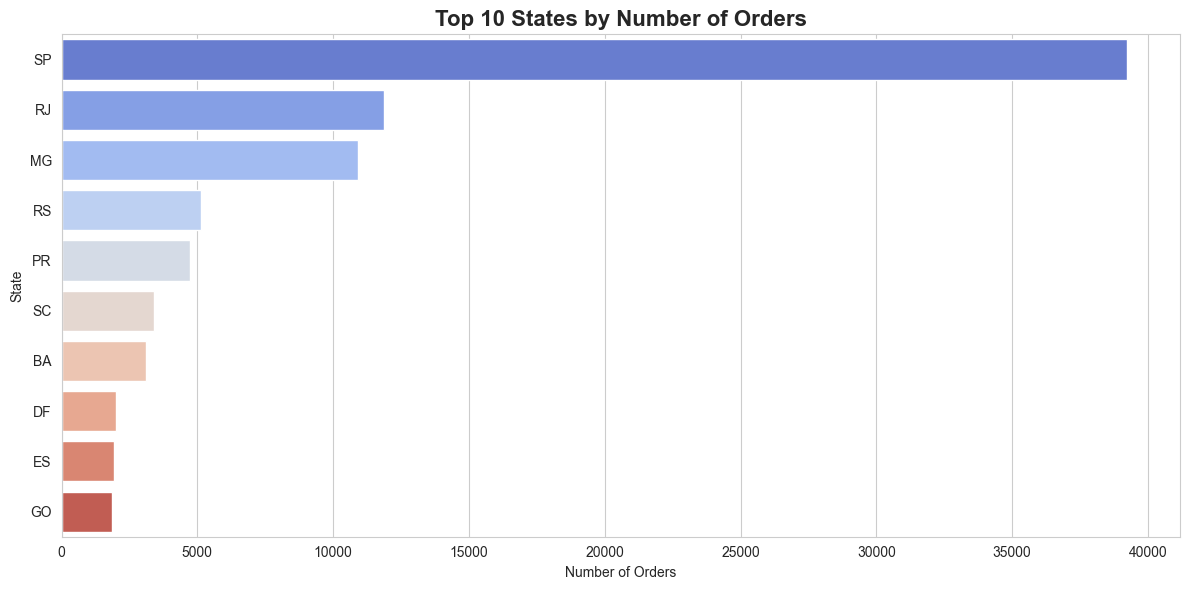

In [21]:
# Customer location data
print("\n--- Analyzing Customer Geographic Distribution ---")
customer_location = orders_items_merged.groupby(['customer_state', 'customer_city']).agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()
customer_location.columns = ['state', 'city', 'total_orders', 'total_revenue']

# Top states by orders
state_orders = orders_items_merged.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False).head(10)

print("\n=== Top 10 States by Number of Orders ===")
print(state_orders)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_orders.values, y=state_orders.index, palette='coolwarm')
plt.title('Top 10 States by Number of Orders', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.tight_layout()
plt.savefig('top_states_orders.png', dpi=300, bbox_inches='tight')
print("✓ Saved: top_states_orders.png")

In [22]:
# Top states by revenue
print("\n=== Top 10 States by Revenue ===")
state_revenue = orders_items_merged.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)
print(state_revenue)


=== Top 10 States by Revenue ===
customer_state
SP    6210358.48
RJ    2119526.42
MG    1843063.14
RS     935885.10
PR     852690.84
SC     609923.51
BA     596913.86
GO     400827.12
DF     330035.38
ES     307515.71
Name: payment_value, dtype: float64


In [23]:
# Create heatmap
print("\n--- Creating Geographic Heatmap ---")
geo_clean_map = geo_clean.copy()
customers_with_geo = customers_clean.merge(
    geo_clean_map, 
    left_on='customer_zip_code_prefix', 
    right_on='geolocation_zip_code_prefix',
    how='left'
)

location_counts = customers_with_geo.groupby(['geolocation_lat', 'geolocation_lng']).size().reset_index(name='customer_count')
location_counts = location_counts.dropna()

# Create folium map
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['customer_count']] 
             for idx, row in location_counts.iterrows()]

HeatMap(heat_data, radius=15, blur=25, max_zoom=13).add_to(brazil_map)

brazil_map.save('customer_heatmap.html')
print(f"✓ Saved: customer_heatmap.html")
print(f"  Total locations plotted: {len(location_counts)}")
brazil_map


--- Creating Geographic Heatmap ---
✓ Saved: customer_heatmap.html
  Total locations plotted: 14833


### Clustering Analysis


Menggunakan metode binning berdasarkan karakteristik RFM

--- Grouping Results ---
Recency Groups:
recency_group
Moderate    30363
Recent      29814
Old         29563
Name: count, dtype: int64

Frequency Groups:
frequency_group
Low     87042
High     2698
Name: count, dtype: int64

Monetary Groups:
monetary_group
Medium    30512
Low       29614
High      29614
Name: count, dtype: int64

=== Manual Cluster Distribution ===
cluster
0      727
1     1870
2    28822
3    58321
Name: count, dtype: int64

=== Manual Cluster Summary ===
         Avg_Recency  Avg_Frequency  Avg_Monetary  Customer_Count  \
cluster                                                             
0              74.54           2.20        593.71             727   
1             275.13           2.08        374.43            1870   
2             419.58           1.00        169.77           28822   
3             149.00           1.00        170.49           58321   

                   Label  
cluster              

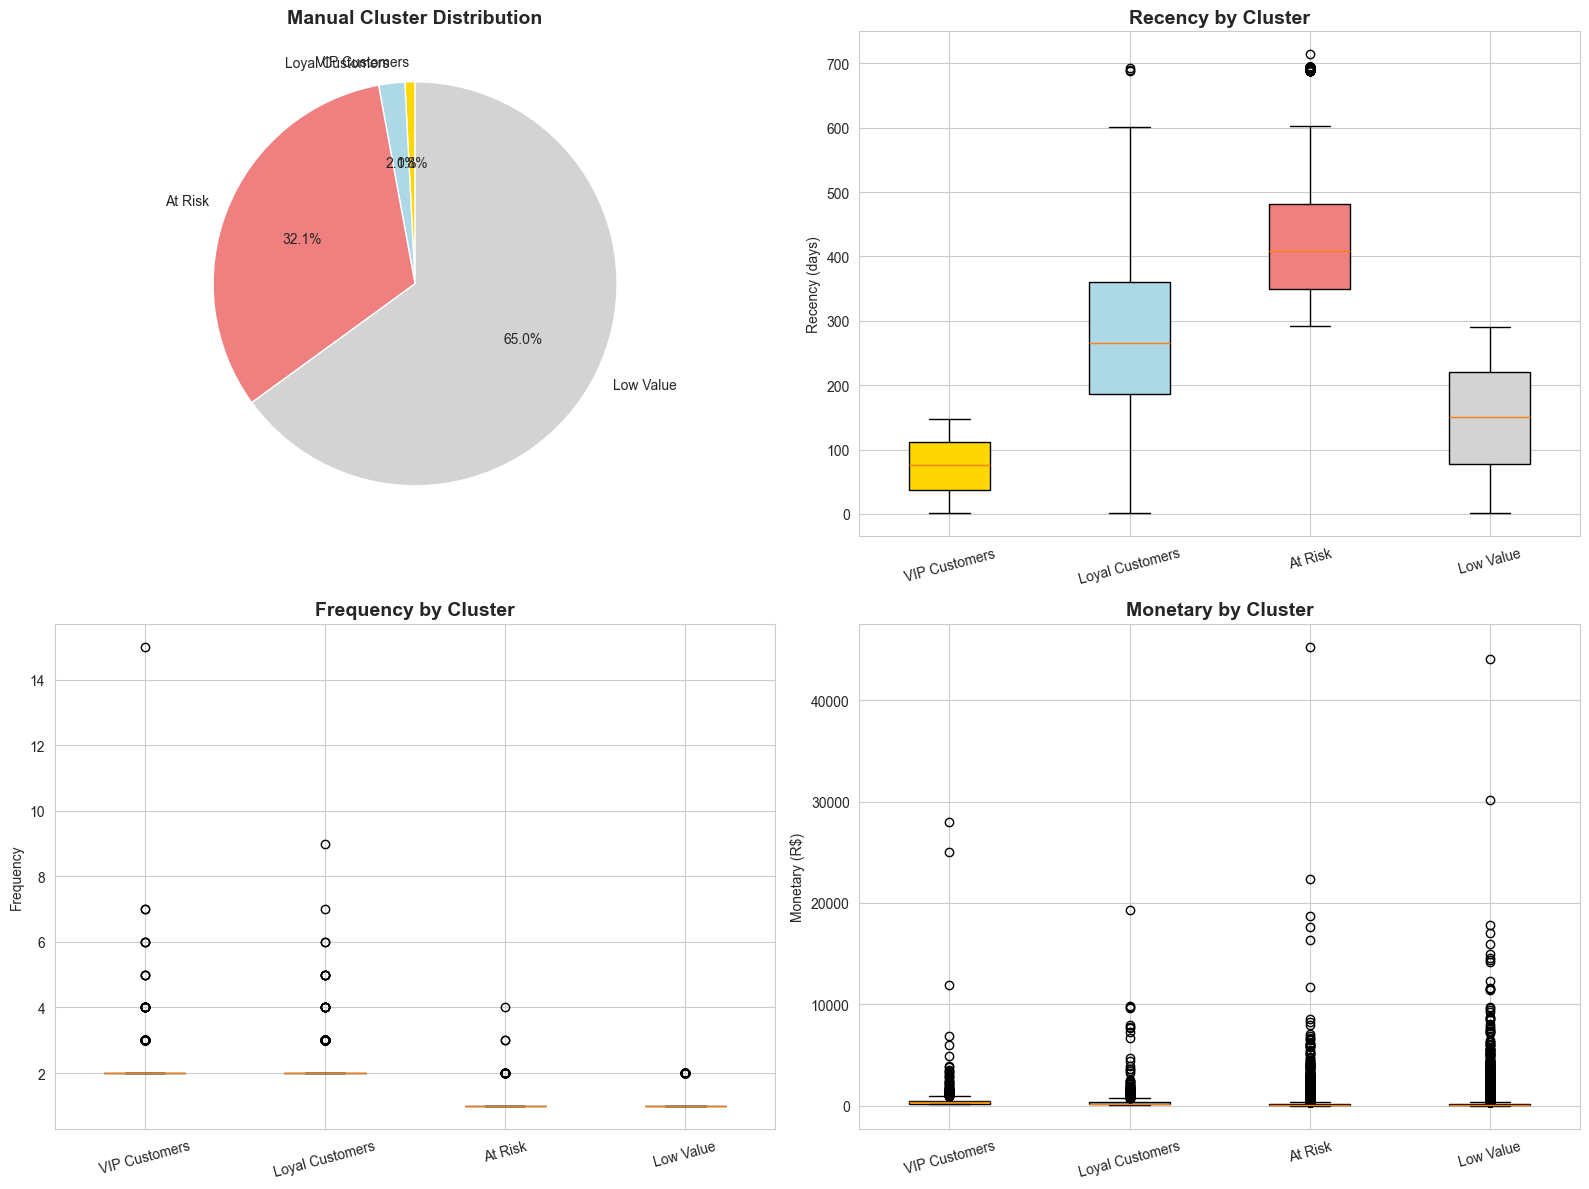

In [24]:
print("\nMenggunakan metode binning berdasarkan karakteristik RFM")

# Create copy for clustering
rfm_manual_cluster = rfm_data.copy()

# Define bins based on quartiles
# Recency: Lower is better (inverse)
recency_bins = rfm_manual_cluster['recency'].quantile([0, 0.33, 0.67, 1]).values
# Check if bins are unique
if len(set(recency_bins)) > 1:
    rfm_manual_cluster['recency_group'] = pd.cut(rfm_manual_cluster['recency'], 
                                                  bins=recency_bins, 
                                                  labels=['Recent', 'Moderate', 'Old'],
                                                  include_lowest=True,
                                                  duplicates='drop')
else:
    # If all values are the same, assign all to one group
    rfm_manual_cluster['recency_group'] = 'Moderate'

# Frequency: Higher is better
freq_median = rfm_manual_cluster['frequency'].median()
rfm_manual_cluster['frequency_group'] = rfm_manual_cluster['frequency'].apply(
    lambda x: 'High' if x > freq_median else 'Low'
)

# Monetary: Higher is better
monetary_bins = rfm_manual_cluster['monetary'].quantile([0, 0.33, 0.67, 1]).values
# Check if bins are unique
if len(set(monetary_bins)) > 1:
    rfm_manual_cluster['monetary_group'] = pd.cut(rfm_manual_cluster['monetary'], 
                                                  bins=monetary_bins, 
                                                  labels=['Low', 'Medium', 'High'],
                                                  include_lowest=True,
                                                  duplicates='drop')
else:
    # If all values are the same, assign all to one group
    rfm_manual_cluster['monetary_group'] = 'Medium'

print("\n--- Grouping Results ---")
print("Recency Groups:")
print(rfm_manual_cluster['recency_group'].value_counts(dropna=False))
print("\nFrequency Groups:")
print(rfm_manual_cluster['frequency_group'].value_counts(dropna=False))
print("\nMonetary Groups:")
print(rfm_manual_cluster['monetary_group'].value_counts(dropna=False))

# Fill any NaN values that might occur from binning
rfm_manual_cluster['recency_group'] = rfm_manual_cluster['recency_group'].fillna('Moderate')
rfm_manual_cluster['frequency_group'] = rfm_manual_cluster['frequency_group'].fillna('Low')
rfm_manual_cluster['monetary_group'] = rfm_manual_cluster['monetary_group'].fillna('Medium')

# Convert categorical to string for easier handling
rfm_manual_cluster['recency_group'] = rfm_manual_cluster['recency_group'].astype(str)
rfm_manual_cluster['frequency_group'] = rfm_manual_cluster['frequency_group'].astype(str)
rfm_manual_cluster['monetary_group'] = rfm_manual_cluster['monetary_group'].astype(str)

# Create manual clusters based on business rules
def assign_manual_cluster(row):
    """
    Assign cluster based on manual rules:
    - Cluster 0 (VIP Customers): Recent + High Frequency + High Monetary
    - Cluster 1 (Loyal Customers): High Frequency + Medium/High Monetary
    - Cluster 2 (At Risk): Old + Any Frequency + Any Monetary
    - Cluster 3 (Low Value): Any Recency + Low Frequency + Low Monetary
    """
    
    if row['recency_group'] == 'Recent' and row['frequency_group'] == 'High' and row['monetary_group'] == 'High':
        return 0
    elif row['frequency_group'] == 'High' and row['monetary_group'] in ['Medium', 'High']:
        return 1
    elif row['recency_group'] == 'Old':
        return 2
    else:
        return 3

rfm_manual_cluster['manual_cluster'] = rfm_manual_cluster.apply(assign_manual_cluster, axis=1)
rfm_data['cluster'] = rfm_manual_cluster['manual_cluster']

print("\n=== Manual Cluster Distribution ===")
print(rfm_data['cluster'].value_counts().sort_index())

# Analyze manual clusters
cluster_summary = rfm_data.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_unique_id': 'count'
}).round(2)
cluster_summary.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']

cluster_labels = {
    0: 'VIP Customers',
    1: 'Loyal Customers',
    2: 'At Risk',
    3: 'Low Value'
}

cluster_summary['Label'] = cluster_summary.index.map(cluster_labels)

print("\n=== Manual Cluster Summary ===")
print(cluster_summary)

print("\n=== Cluster Percentage Distribution ===")
cluster_pct = rfm_data['cluster'].value_counts(normalize=True).sort_index() * 100
for idx, pct in cluster_pct.items():
    print(f"Cluster {idx} ({cluster_labels[idx]}): {pct:.2f}%")

# Visualize manual clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

cluster_counts = rfm_data['cluster'].value_counts().sort_index()
cluster_names = [cluster_labels[i] for i in cluster_counts.index]
colors = ['gold', 'lightblue', 'lightcoral', 'lightgray']

# Cluster distribution pie chart
axes[0, 0].pie(cluster_counts.values, labels=cluster_names, autopct='%1.1f%%', 
               startangle=90, colors=colors)
axes[0, 0].set_title('Manual Cluster Distribution', fontsize=14, fontweight='bold')

# Recency by cluster
cluster_recency = [rfm_data[rfm_data['cluster'] == i]['recency'].values for i in range(4)]
bp1 = axes[0, 1].boxplot(cluster_recency, labels=cluster_names, patch_artist=True)
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_title('Recency by Cluster', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Recency (days)')
axes[0, 1].tick_params(axis='x', rotation=15)

# Frequency by cluster
cluster_frequency = [rfm_data[rfm_data['cluster'] == i]['frequency'].values for i in range(4)]
bp2 = axes[1, 0].boxplot(cluster_frequency, labels=cluster_names, patch_artist=True)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 0].set_title('Frequency by Cluster', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].tick_params(axis='x', rotation=15)

# Monetary by cluster
cluster_monetary = [rfm_data[rfm_data['cluster'] == i]['monetary'].values for i in range(4)]
bp3 = axes[1, 1].boxplot(cluster_monetary, labels=cluster_names, patch_artist=True)
for patch, color in zip(bp3['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 1].set_title('Monetary by Cluster', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Monetary (R$)')
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('manual_clusters_boxplot.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: manual_clusters_boxplot.png")

✓ Saved: manual_clusters_2d_scatter.png


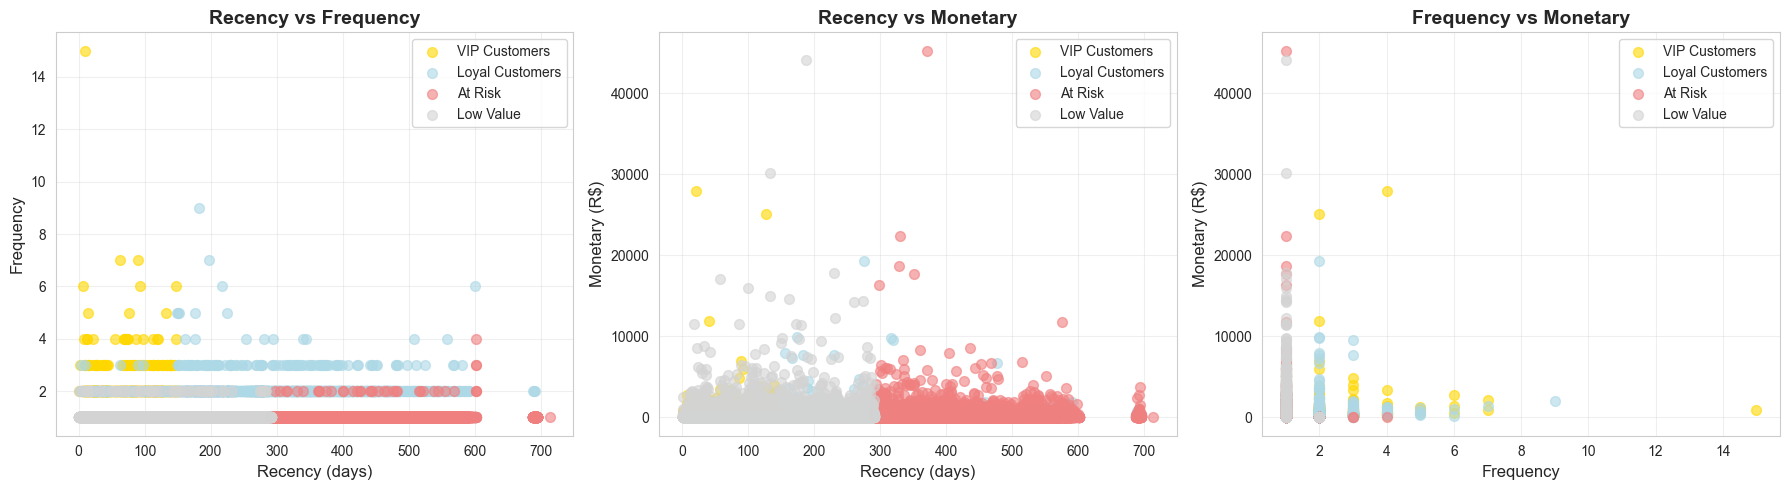

In [25]:
# 2D Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors_map = {0: 'gold', 1: 'lightblue', 2: 'lightcoral', 3: 'lightgray'}

# Recency vs Frequency
for cluster in range(4):
    cluster_data = rfm_data[rfm_data['cluster'] == cluster]
    axes[0].scatter(cluster_data['recency'], cluster_data['frequency'], 
                   c=colors_map[cluster], label=cluster_labels[cluster], alpha=0.6, s=50)
axes[0].set_xlabel('Recency (days)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Recency vs Frequency', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Recency vs Monetary
for cluster in range(4):
    cluster_data = rfm_data[rfm_data['cluster'] == cluster]
    axes[1].scatter(cluster_data['recency'], cluster_data['monetary'], 
                   c=colors_map[cluster], label=cluster_labels[cluster], alpha=0.6, s=50)
axes[1].set_xlabel('Recency (days)', fontsize=12)
axes[1].set_ylabel('Monetary (R$)', fontsize=12)
axes[1].set_title('Recency vs Monetary', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Frequency vs Monetary
for cluster in range(4):
    cluster_data = rfm_data[rfm_data['cluster'] == cluster]
    axes[2].scatter(cluster_data['frequency'], cluster_data['monetary'], 
                   c=colors_map[cluster], label=cluster_labels[cluster], alpha=0.6, s=50)
axes[2].set_xlabel('Frequency', fontsize=12)
axes[2].set_ylabel('Monetary (R$)', fontsize=12)
axes[2].set_title('Frequency vs Monetary', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('manual_clusters_2d_scatter.png', dpi=300, bbox_inches='tight')
print("✓ Saved: manual_clusters_2d_scatter.png")

✓ Saved: manual_clusters_3d.png

=== Cluster Characteristics ===
Cluster 0 (VIP): Recent buyers with high frequency and high spending
Cluster 1 (Loyal): High frequency buyers with good spending
Cluster 2 (At Risk): Haven't purchased recently, need re-engagement
Cluster 3 (Low Value): Low frequency and low spending customers


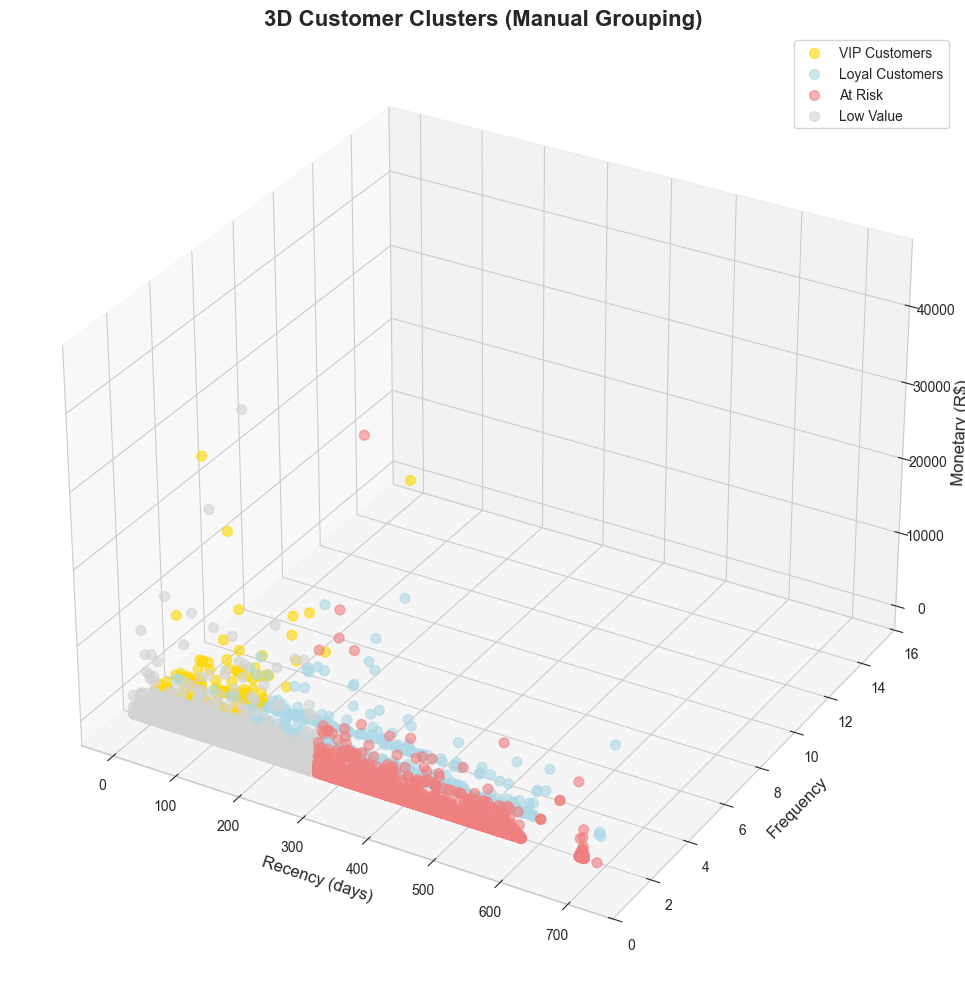

In [26]:
# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors_3d = ['gold', 'lightblue', 'lightcoral', 'lightgray']
for i in range(4):
    cluster_data = rfm_data[rfm_data['cluster'] == i]
    ax.scatter(cluster_data['recency'], 
              cluster_data['frequency'], 
              cluster_data['monetary'],
              c=colors_3d[i], 
              label=cluster_labels[i],
              alpha=0.6,
              s=50)

ax.set_xlabel('Recency (days)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Monetary (R$)', fontsize=12)
ax.set_title('3D Customer Clusters (Manual Grouping)', fontsize=16, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.savefig('manual_clusters_3d.png', dpi=300, bbox_inches='tight')
print("✓ Saved: manual_clusters_3d.png")

print("\n=== Cluster Characteristics ===")
print("Cluster 0 (VIP): Recent buyers with high frequency and high spending")
print("Cluster 1 (Loyal): High frequency buyers with good spending")
print("Cluster 2 (At Risk): Haven't purchased recently, need re-engagement")
print("Cluster 3 (Low Value): Low frequency and low spending customers")

### Product Association and Cross-Selling Analysis


Orders with multiple items: 9495
Percentage: 10.24%

=== Top 15 Product Category Pairs ===
bed_bath_table + furniture_decor: 69 times
bed_bath_table + home_confort: 43 times
furniture_decor + housewares: 24 times
bed_bath_table + housewares: 19 times
baby + cool_stuff: 19 times
baby + toys: 18 times
furniture_decor + garden_tools: 16 times
baby + bed_bath_table: 16 times
housewares + sem_categoria: 14 times
health_beauty + sports_leisure: 14 times
furniture_decor + home_construction: 12 times
baby + furniture_decor: 12 times
construction_tools_lights + furniture_decor: 11 times
housewares + sports_leisure: 11 times
garden_tools + housewares: 11 times

✓ Saved: product_associations.png


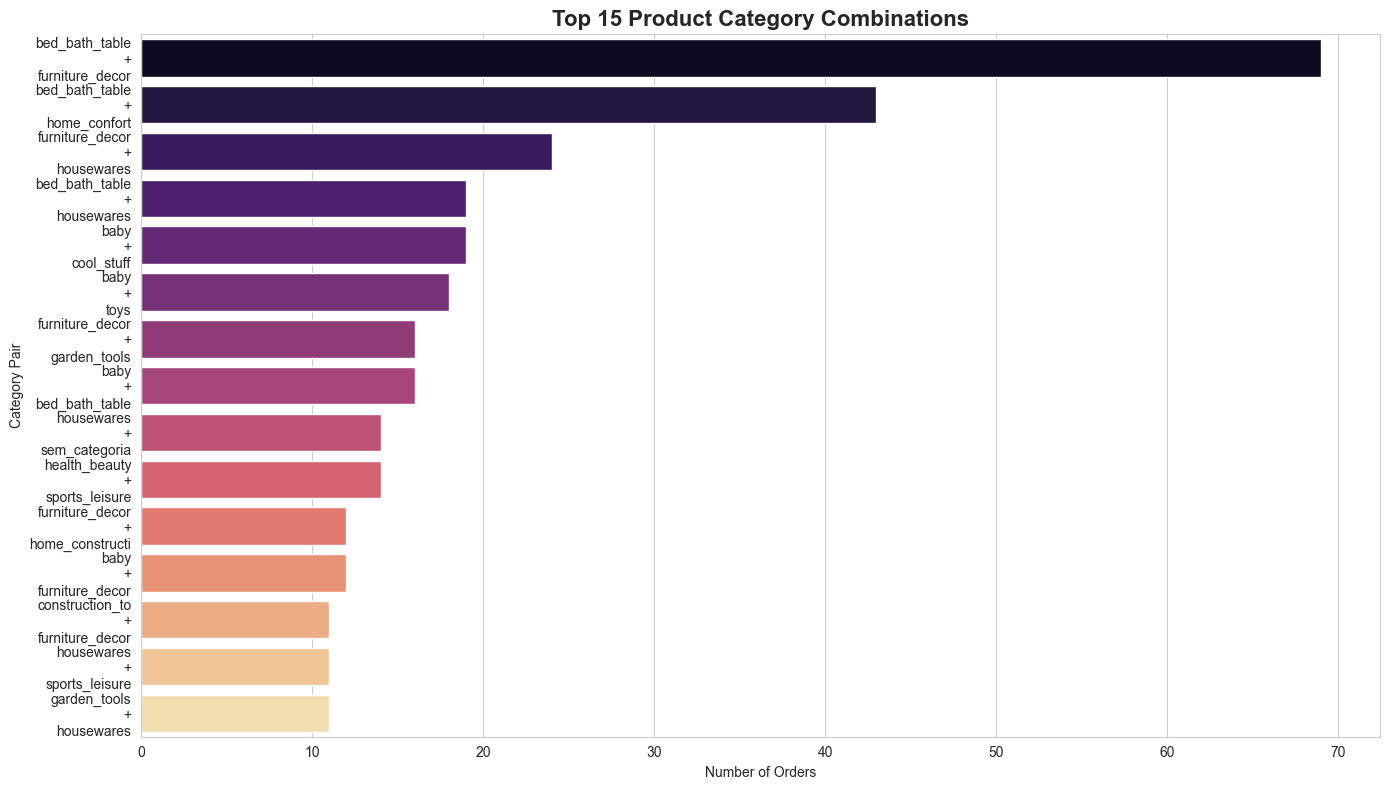

In [27]:
# Get orders with multiple items
multi_item_orders = orders_items_merged.groupby('order_id')['product_category_name_english'].apply(list).reset_index()
multi_item_orders = multi_item_orders[multi_item_orders['product_category_name_english'].apply(len) > 1]

print(f"\nOrders with multiple items: {len(multi_item_orders)}")
print(f"Percentage: {len(multi_item_orders)/orders_items_merged['order_id'].nunique()*100:.2f}%")

# Find most common category combinations
category_pairs = []
for categories in multi_item_orders['product_category_name_english']:
    unique_cats = list(set(categories))
    if len(unique_cats) > 1:
        pairs = list(combinations(sorted(unique_cats), 2))
        category_pairs.extend(pairs)

pair_counts = Counter(category_pairs)
top_pairs = pair_counts.most_common(15)

print("\n=== Top 15 Product Category Pairs ===")
for pair, count in top_pairs:
    print(f"{pair[0]} + {pair[1]}: {count} times")

# Visualize top product pairs
pairs_df = pd.DataFrame(top_pairs, columns=['pair', 'count'])
pairs_df['pair_label'] = pairs_df['pair'].apply(lambda x: f"{x[0][:15]}\n+\n{x[1][:15]}")

plt.figure(figsize=(14, 8))
sns.barplot(data=pairs_df, x='count', y='pair_label', palette='magma')
plt.title('Top 15 Product Category Combinations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Category Pair')
plt.tight_layout()
plt.savefig('product_associations.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: product_associations.png")

### Delivery Performance Analysis


=== Delivery Performance ===
Average actual delivery time: 12.09 days
Average estimated delivery time: 23.37 days
On-time delivery rate: 92.43%
Average delivery difference: 11.28 days

✓ Saved: delivery_performance.png


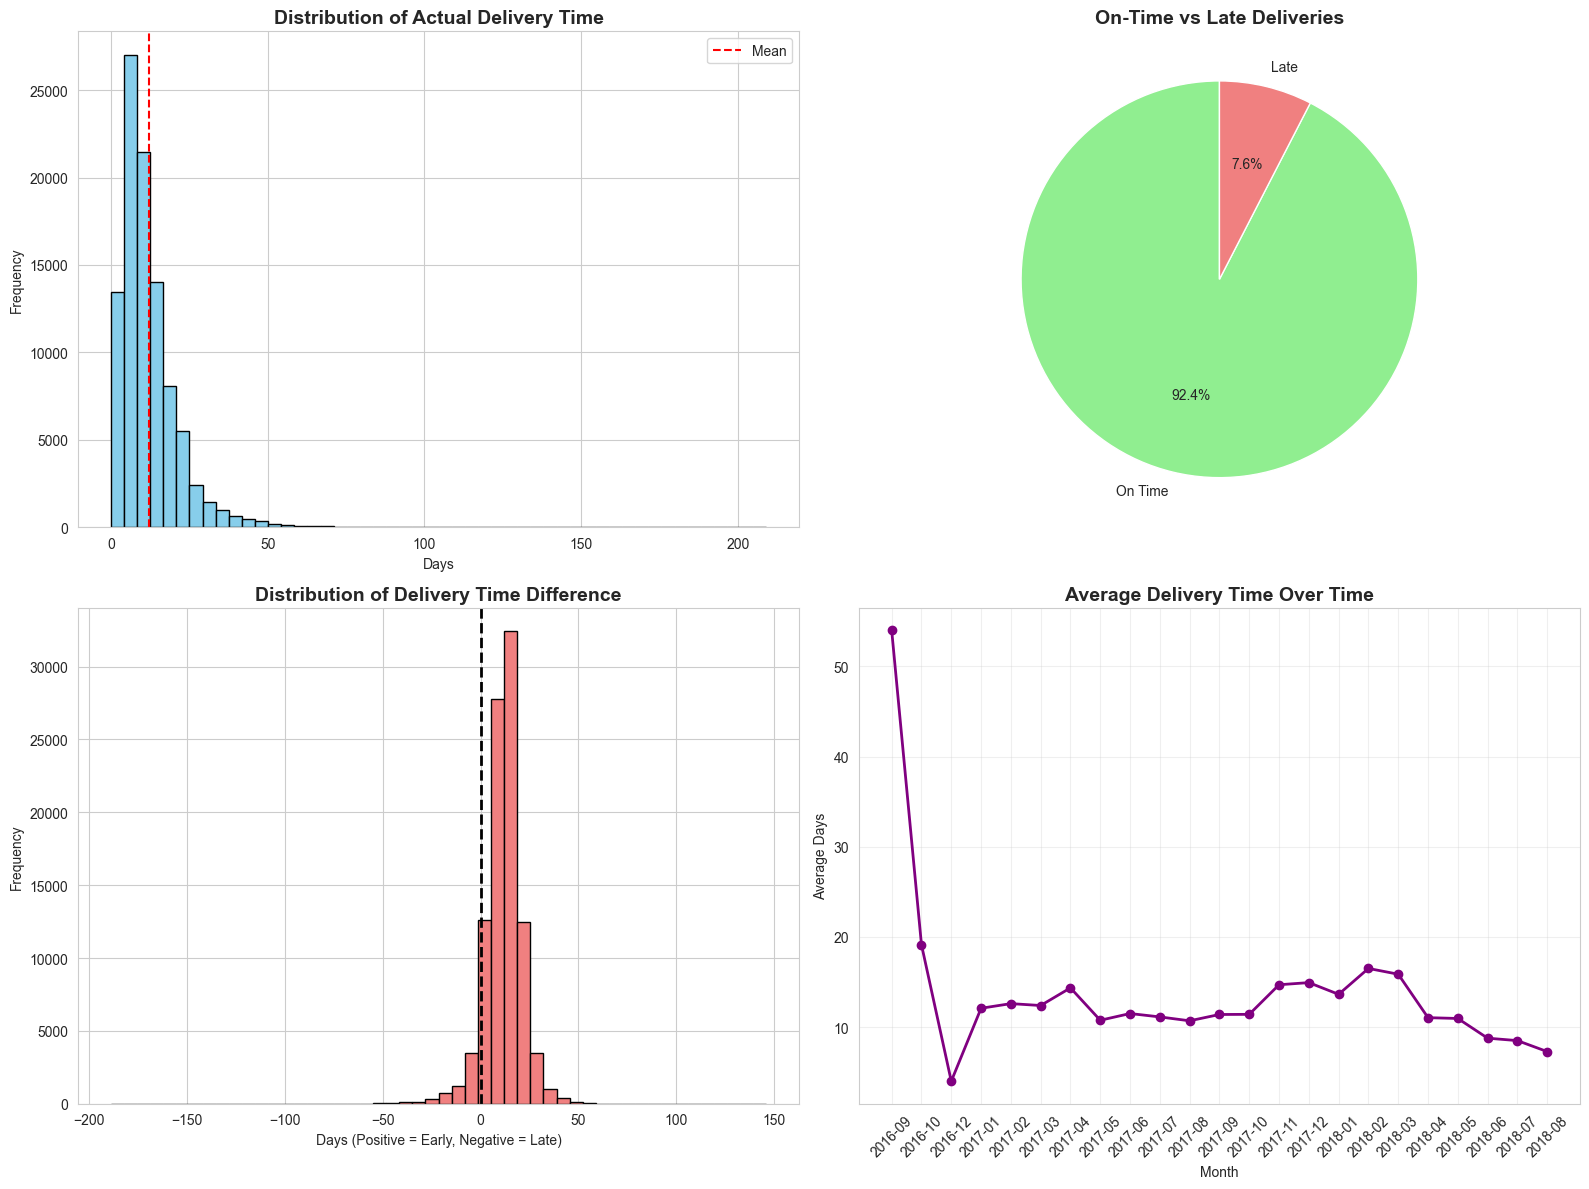

In [28]:
# Calculate delivery time
delivery_analysis = orders_clean.copy()
delivery_analysis['actual_delivery_time'] = (
    delivery_analysis['order_delivered_customer_date'] - 
    delivery_analysis['order_purchase_timestamp']
).dt.days

delivery_analysis['estimated_delivery_time'] = (
    delivery_analysis['order_estimated_delivery_date'] - 
    delivery_analysis['order_purchase_timestamp']
).dt.days

delivery_analysis['delivery_diff'] = (
    delivery_analysis['estimated_delivery_time'] - 
    delivery_analysis['actual_delivery_time']
)

delivery_analysis['on_time'] = delivery_analysis['delivery_diff'] >= 0

print("\n=== Delivery Performance ===")
print(f"Average actual delivery time: {delivery_analysis['actual_delivery_time'].mean():.2f} days")
print(f"Average estimated delivery time: {delivery_analysis['estimated_delivery_time'].mean():.2f} days")
print(f"On-time delivery rate: {delivery_analysis['on_time'].mean()*100:.2f}%")
print(f"Average delivery difference: {delivery_analysis['delivery_diff'].mean():.2f} days")

# Visualize delivery performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of actual delivery time
axes[0, 0].hist(delivery_analysis['actual_delivery_time'].dropna(), bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Actual Delivery Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(delivery_analysis['actual_delivery_time'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

# On-time vs Late delivery
on_time_counts = delivery_analysis['on_time'].value_counts()
axes[0, 1].pie(on_time_counts.values, labels=['On Time', 'Late'], autopct='%1.1f%%', 
               colors=['lightgreen', 'lightcoral'], startangle=90)
axes[0, 1].set_title('On-Time vs Late Deliveries', fontsize=14, fontweight='bold')

# Delivery difference distribution
axes[1, 0].hist(delivery_analysis['delivery_diff'].dropna(), bins=50, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Distribution of Delivery Time Difference', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Days (Positive = Early, Negative = Late)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(0, color='black', linestyle='--', linewidth=2)

# Delivery time by month
delivery_analysis['month'] = delivery_analysis['order_purchase_timestamp'].dt.to_period('M').astype(str)
monthly_delivery = delivery_analysis.groupby('month')['actual_delivery_time'].mean()
axes[1, 1].plot(monthly_delivery.index, monthly_delivery.values, marker='o', linewidth=2, color='purple')
axes[1, 1].set_title('Average Delivery Time Over Time', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Days')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('delivery_performance.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: delivery_performance.png")

## Conclusion

1. Kesimpulan Pertanyaan 1: Distribusi Penjualan dan Tren
   - Kategori bed_bath_table, healthy_beauty, dan sports_leisure adalah kategori paling laris berdasarkan volume penjualan
   - Terdapat trend peningkatan penjualan yang signifikan dari September 2016 hingga Agustus 2018
   - Puncak penjulana terjadi pada November 2017, kemungkinan karena musim liburan (Black Friday)
  
2. Kesimpulan Pertanyaan 2: Analisis Pelanggan (RFM)
   - Mayoritas pelanggan termasuk dalam kategori Potential Loyalists dan At Risk
   - Hanya sekitar 8% pelanggan yag termasuk kategori Champions dengan nilai RFM tertinggi
   - Champions memiliki recency rendah, frequency tinggi, dan monetary value yang lebih besar
   - Diperlukan strategi retention dan reactivateion untuk pelanggan At Risk dan Lost
  
3. Kesimpulan Analisis Lanjutan
   - Manual Clustering: Menggunakan bining berdasarkan kuartil untuk mengindentifikasi 4 segmen pelanggan
   - Segmentasi Pelanggan:
     * VIP Customers: target untuk program loyalty premium
     * Lyal Customers: kandidat untuk upselling dan cross-selling
     * At Risk: perlu kampanye re-engagement dan special offers
     * Low Value: fokus pada acquisition cost vs lifetime value
   - Cross-selling opportunity: produk tertentu sering dibeli bersamaan dan bisa dijadikan bundling
   - Delivery performance: on-time delivery rate 93% dengan rata-rata 12 hari pengiriman
   - Geographic: Sao Paolo mendominasi dengan 42% total orders, potensi ekspansi di wilayah Utara dan Nordeste

## Export Data untuk Dashboard

In [48]:
# Create directory for dashboard data
os.makedirs('dashboard_data', exist_ok=True)

print("\nExporting data for dashboard...")

# 1. Export main merged dataset
orders_items_merged.to_csv('dashboard_data/orders_complete.csv', index=False)
print("✓ Exported: orders_complete.csv")

# 2. Export RFM data
rfm_data.to_csv('dashboard_data/rfm_analysis.csv', index=False)
print("✓ Exported: rfm_analysis.csv")

# 3. Export cluster summary
cluster_summary.to_csv('dashboard_data/cluster_summary.csv')
print("✓ Exported: cluster_summary.csv")

# 4. Export monthly sales
monthly_sales.to_csv('dashboard_data/monthly_sales.csv', index=False)
print("✓ Exported: monthly_sales.csv")

# 5. Export delivery analysis
delivery_analysis[['order_id', 'actual_delivery_time', 'estimated_delivery_time', 
                   'delivery_diff', 'on_time']].to_csv('dashboard_data/delivery_performance.csv', index=False)
print("✓ Exported: delivery_performance.csv")

# 6. Export geographic data for dashboard
print("\nPreparing geographic data for dashboard...")

# State-level aggregation
state_data = orders_items_merged.groupby('customer_state').agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
    'customer_unique_id': 'nunique'
}).reset_index()
state_data.columns = ['state', 'total_orders', 'total_revenue', 'total_customers']
state_data = state_data.sort_values('total_orders', ascending=False)
state_data.to_csv('dashboard_data/state_summary.csv', index=False)
print("✓ Exported: state_summary.csv")

# City-level aggregation (top 100 cities)
city_data = orders_items_merged.groupby(['customer_state', 'customer_city']).agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
    'customer_unique_id': 'nunique'
}).reset_index()
city_data.columns = ['state', 'city', 'total_orders', 'total_revenue', 'total_customers']
city_data = city_data.sort_values('total_orders', ascending=False).head(100)
city_data.to_csv('dashboard_data/city_summary.csv', index=False)
print("✓ Exported: city_summary.csv")

# 7. Export geolocation data with coordinates
geo_for_dashboard = geo_clean.copy()
geo_for_dashboard.to_csv('dashboard_data/geolocation_clean.csv', index=False)
print("✓ Exported: geolocation_clean.csv")

# 8. Create customer location with coordinates for heatmap
customers_geo_data = customers_with_geo[['customer_unique_id', 'customer_city', 'customer_state', 
                                          'geolocation_lat', 'geolocation_lng']].dropna()
customers_geo_data.to_csv('dashboard_data/customers_with_coordinates.csv', index=False)
print("✓ Exported: customers_with_coordinates.csv")

# 9. Export category data
category_data = orders_items_merged.groupby('product_category_name_english').agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
    'price': 'mean'
}).reset_index()
category_data.columns = ['category', 'total_orders', 'total_revenue', 'avg_price']
category_data = category_data.sort_values('total_orders', ascending=False)
category_data.to_csv('dashboard_data/category_summary.csv', index=False)
print("✓ Exported: category_summary.csv")

# 10. Export payment type data
payment_data = orders_items_merged.groupby('payment_type').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()
payment_data.columns = ['payment_type', 'total_orders', 'total_value']
payment_data.to_csv('dashboard_data/payment_summary.csv', index=False)
print("✓ Exported: payment_summary.csv")

# 11. Export review data
if 'review_score' in orders_items_merged.columns:
    review_data = orders_items_merged.groupby('review_score').agg({
        'order_id': 'nunique'
    }).reset_index()
    review_data.columns = ['review_score', 'count']
    review_data.to_csv('dashboard_data/review_summary.csv', index=False)
    print("✓ Exported: review_summary.csv")

# 12. Export product pairs for cross-selling
if len(top_pairs) > 0:
    pairs_export = pd.DataFrame(top_pairs, columns=['pair', 'count'])
    pairs_export['category_1'] = pairs_export['pair'].apply(lambda x: x[0])
    pairs_export['category_2'] = pairs_export['pair'].apply(lambda x: x[1])
    pairs_export = pairs_export[['category_1', 'category_2', 'count']]
    pairs_export.to_csv('dashboard_data/product_pairs.csv', index=False)
    print("✓ Exported: product_pairs.csv")


Exporting data for dashboard...
✓ Exported: orders_complete.csv
✓ Exported: rfm_analysis.csv
✓ Exported: cluster_summary.csv
✓ Exported: monthly_sales.csv
✓ Exported: delivery_performance.csv

Preparing geographic data for dashboard...
✓ Exported: state_summary.csv
✓ Exported: city_summary.csv
✓ Exported: geolocation_clean.csv
✓ Exported: customers_with_coordinates.csv
✓ Exported: category_summary.csv
✓ Exported: payment_summary.csv
✓ Exported: review_summary.csv
✓ Exported: product_pairs.csv
